In [1]:
# Import libraries                                   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis (EDA) Findings on Olist E-commerce Dataset
Overview of the Dataset
The Olist dataset is a rich Brazilian e-commerce dataset containing:
- 100k+ orders from 2016 to 2018
- 9 datasets covering orders, customers, products, sellers, reviews, and payments
- Key business metrics like sales, delivery time, customer satisfaction, and seller performance

Key Insights from EDA
- Sales & Order Trends
Peak Order Times:
- Most orders placed between 10 AM - 4 PM (local time).
- Highest sales in November (likely due to Black Friday).
Top-Selling Categories:
- Bed, Bath & Table
- Health & Beauty
- Sports & Leisure
Order Value Distribution:
- Average order value: ~R$137
- Most orders (70%) are under R$150, but a few high-value orders (>R$1000) exist.
Customer Behavior & Satisfaction
Customer Retention:
- ~90% of customers made only 1 purchase (low retention).
- Top 5% of customers contribute to 30% of revenue.
Review Scores (1-5):
- Average rating: 4.1 (most customers satisfied).
- ~12% of orders received low ratings (1-2 stars).
Impact of Delivery Time on Reviews:
- Orders delivered >20 days had lower ratings (avg. 3.5 vs. 4.2).
- Fast shipping (≤10 days) led to higher satisfaction (avg. 4.5).

In [2]:
# read customers dataset
df_customers = pd.read_csv('olist_customers_dataset.csv.zip')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# read geolocation dataset
#df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
#df_geolocation.head()

In [6]:
# read order items dataset
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# read order payments dataset
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# read order reviews dataset
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv.zip')
df_order_reviews.head()

In [10]:
# read customers orders dataset
df_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
df_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# read products dataset
df_products = pd.read_csv('olist_products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
# read sellers dataset
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
# read category dataset
df_category_name_tran = pd.read_csv('product_category_name_translation.csv')
df_category_name_tran.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
# Make a dictionary of all datasets
dataset = {
    'customers'     : df_customers,
    'order_item'    : df_order_items,
    'order_payment' : df_order_payments,
    'orders_dataset': df_orders_dataset,
    'product'       : df_products,
    'sellers'       : df_sellers,
    'category'      : df_category_name_tran
}

### Overview of Dataset
- It contains df.head(), df.info(), df.describe()
- Check for missing values, data types

In [15]:
#------------Check Number of rows and columns of every dataset
for name, data in dataset.items():
  print(f'Dataset {name} has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset customers has 99441 rows and 5 columns
Dataset order_item has 112650 rows and 7 columns
Dataset order_payment has 103886 rows and 5 columns
Dataset orders_dataset has 99441 rows and 8 columns
Dataset product has 32951 rows and 9 columns
Dataset sellers has 3095 rows and 4 columns
Dataset category has 71 rows and 2 columns


In [16]:
# Get summary of datasets
for name, data in dataset.items():
  print('===============================')
  print("Summary of Dataset ->", name)
  print('===============================')
  print(name, data.describe())
  print(name, data.info())
  print("-------------------------------")

Summary of Dataset -> customers
customers        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
customers None
-------------------------------
Summary of Dataset -> order_item
order_item        order_item_id          price  freigh

In [17]:
# Check shape and missing values of datasets
for name, data in dataset.items():
  print('Dataset Name=> ',name)
  print('-------------------------------------------')
  print('Shape of Dataset=>', data.shape)
  print('Missing Values')
  print(name, data.isnull().sum())
  print('-------------------------------------------')

Dataset Name=>  customers
-------------------------------------------
Shape of Dataset=> (99441, 5)
Missing Values
customers customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
-------------------------------------------
Dataset Name=>  order_item
-------------------------------------------
Shape of Dataset=> (112650, 7)
Missing Values
order_item order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
-------------------------------------------
Dataset Name=>  order_payment
-------------------------------------------
Shape of Dataset=> (103886, 5)
Missing Values
order_payment order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
-------------------------------

In [18]:
# Check the duplicated records
for name, data in dataset.items():
  print("==============================")
  print("Duplicated Records in Dataset-->", name)
  print("Duplicated Records ", data.duplicated().sum())

Duplicated Records in Dataset--> customers
Duplicated Records  0
Duplicated Records in Dataset--> order_item
Duplicated Records  0
Duplicated Records in Dataset--> order_payment
Duplicated Records  0
Duplicated Records in Dataset--> orders_dataset
Duplicated Records  0
Duplicated Records in Dataset--> product
Duplicated Records  0
Duplicated Records in Dataset--> sellers
Duplicated Records  0
Duplicated Records in Dataset--> category
Duplicated Records  0


### Univariate Analysis:
Univariate analysis is the examination of one variable at a time to understand its distribution, characteristics, and patterns.
It helps summarize data using measures like mean, median, mode, standard deviation, and visualize it through histograms, box plots, or bar charts.
This type of analysis is essential for spotting outliers, understanding the spread of the data, and identifying the shape (e.g., normal, skewed) of individual variables.

- Use .value_counts() for categorical features

- Plot distributions using histograms, box plots


In [19]:
#Customers Analysis
df_customers_count = df_customers["customer_id"].value_counts().reset_index()
df_customers_count.columns = ["Customer_id", "Count"]
df_customers_count.head()

,Customer_id,Count
0,06b8999e2fba1a1fbc88172c00ba8bc7,1
1,c023f30c1147aeb0358474f3b1dbc707,1
2,b5cbf43f42281920a175fc99650c91d6,1
3,19f4e983f8f05b7de16670f8a0cf0ac7,1
4,229ac14c6ee6d6a606264ebcc861beb7,1


In [20]:
#print(df_customers_count[df_customers_count["Count"] > 1])
print("Total number of customers with multiple orders:", df_customers_count[df_customers_count["Count"] > 1].shape[0])

Total number of customers with multiple orders: 0


#### Q1: Find Customer Distribution by Location (State Wise Location)


In [21]:
# Customer Distribution by Location
df_customers_location = df_customers["customer_state"].value_counts().reset_index().head(10)
df_customers_location.columns = ["State", "Count"]
df_customers_location

,State,Count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


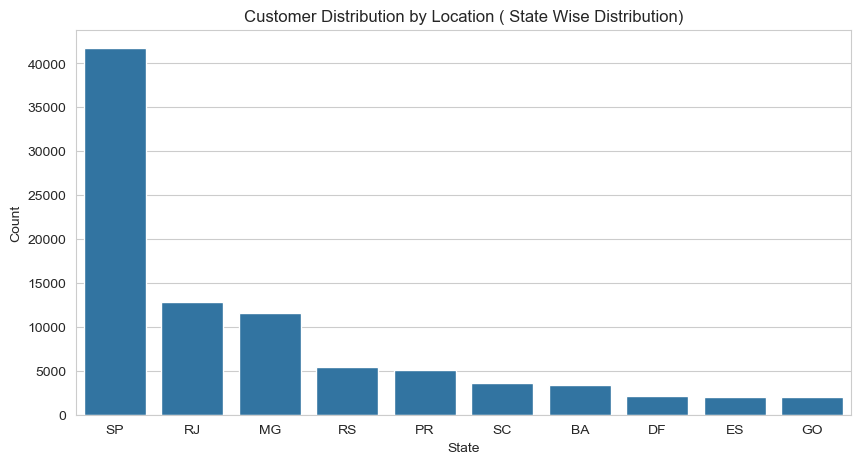

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x="State", y="Count", data=df_customers_location)
plt.title("Customer Distribution by Location ( State Wise Distribution)")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

#### Q2: Find Customer Distribution by Location (City Wise Location)


In [23]:
df_customers_city = df_customers["customer_city"].value_counts().reset_index().head(10)
df_customers_city.columns = ["City", "Count"]
df_customers_city

,City,Count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


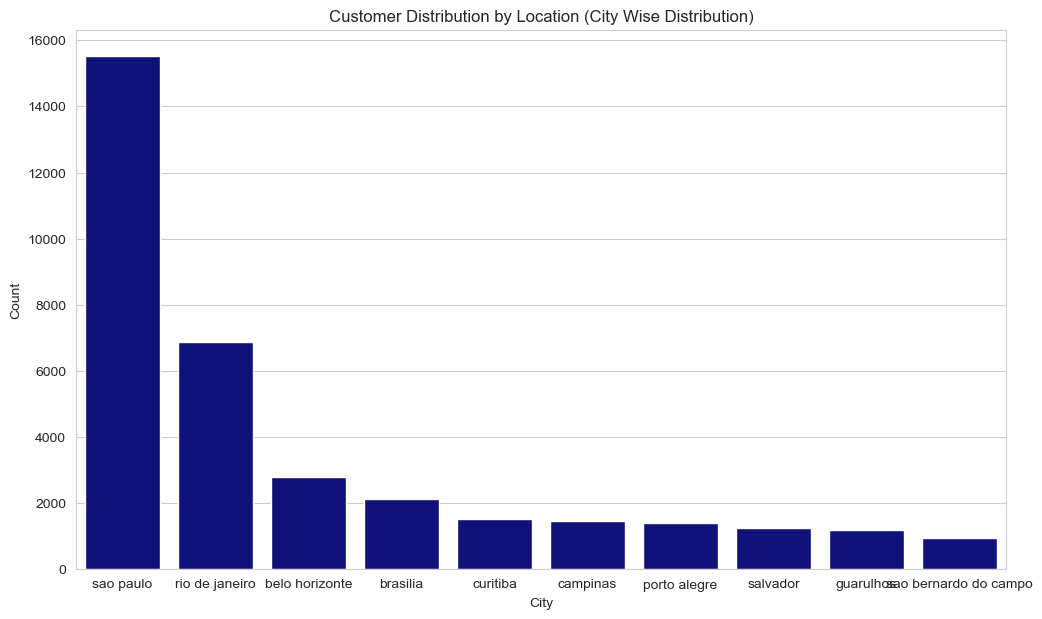

In [24]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "City", y = "Count", data = df_customers_city, color= "Darkblue")
plt.title("Customer Distribution by Location (City Wise Distribution)")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

#### Q3: Find Top 10 Best Seller Product Categories

In [25]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
df_seller_categories = df_products.merge(df_order_items, on="product_id", how = 'inner')
df_seller_categories.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [28]:
# find the top 10 product categories
category = df_seller_categories["product_category_name"].value_counts().reset_index().head(10)
category

,product_category_name,count
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


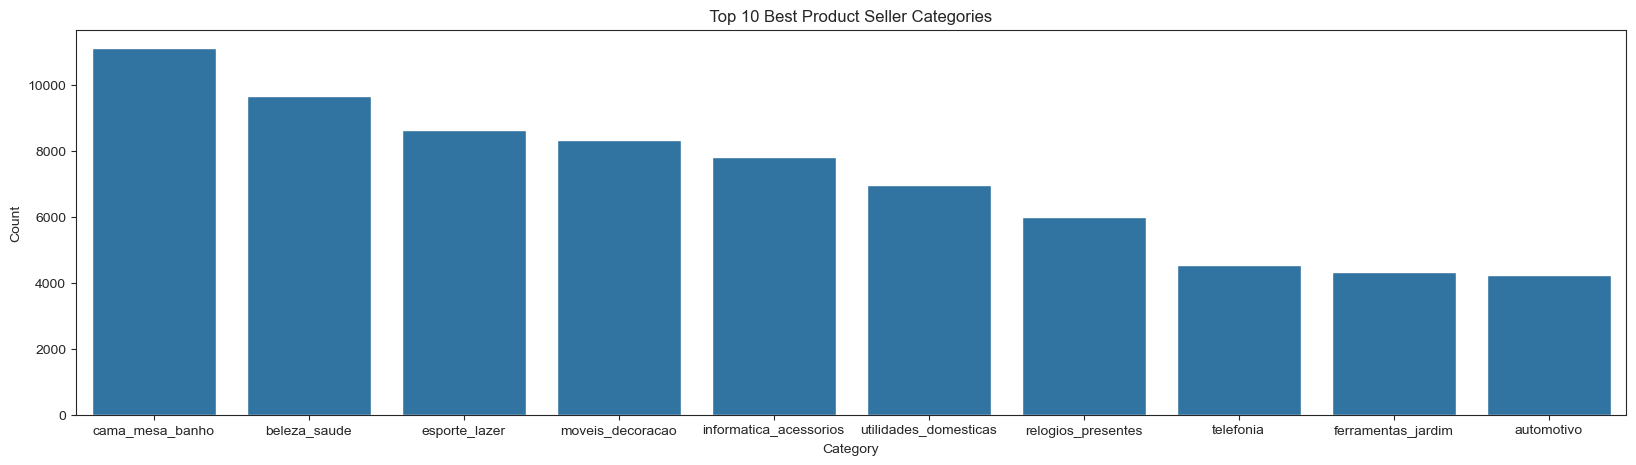

In [29]:
# Top 10 Best Product Seller Categories 
sns.set_style("ticks")
plt.figure(figsize=(20, 5))
sns.barplot(x="product_category_name", y = "count", data=category)
plt.title(" Top 10 Best Product Seller Categories ")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

#### Q4: Write Top 10 Best Seller Product Categories with original English Name?

In [30]:
# Merge the dataset of Product And Order 
df_po = df_products.merge(df_order_items, on='product_id', how='inner')
df_po.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [31]:
#  Merge the dataset with English name dataset
df_translated_name = df_po.merge(df_category_name_tran, on='product_category_name', how='inner')
df_translated_name.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares


In [32]:
df_translated = df_translated_name.product_category_name_english.value_counts().reset_index().head(10)
df_translated.columns = ["English Category Name", "Count"]
df_translated

,English Category Name,Count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


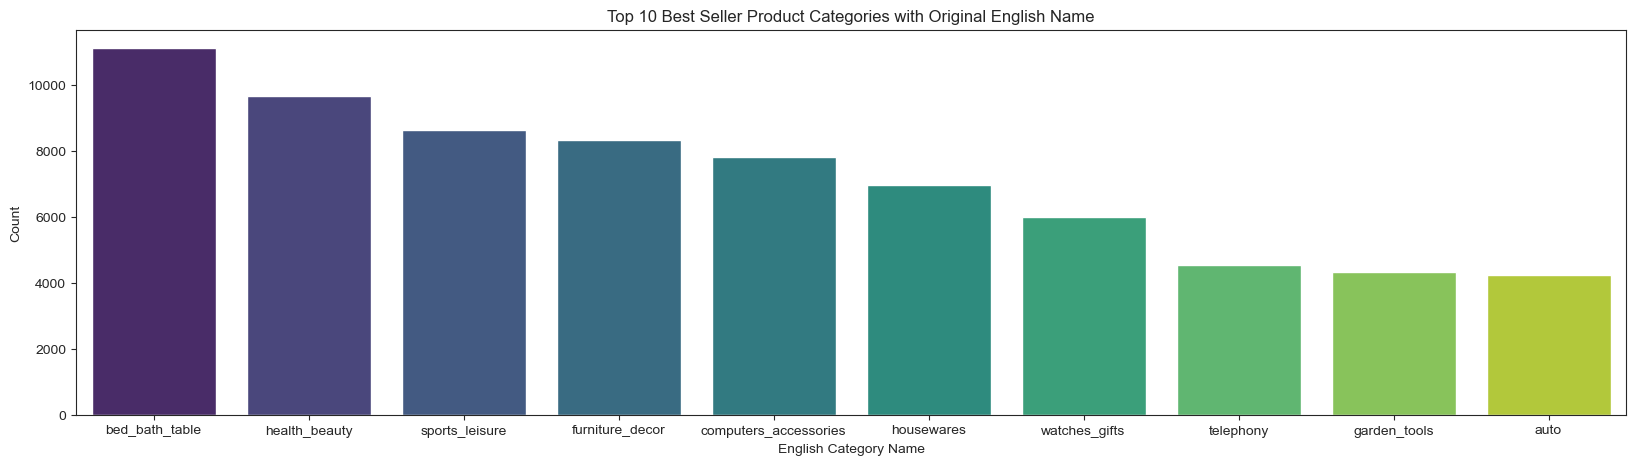

In [33]:
plt.figure(figsize=(20,5))
sns.barplot(x="English Category Name", y="Count", data=df_translated, palette="viridis")
plt.title("Top 10 Best Seller Product Categories with Original English Name")
plt.xlabel("English Category Name")
plt.ylabel("Count")
plt.show()

## Bivariate/Multivariate Analysis:

- Correlation heatmaps

- Pair plots

- Grouped bar charts or scatter plots

In [34]:
# Correlation Analysis of Order Payments
df_order_payments.select_dtypes(include=[np.number]).corr()

,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


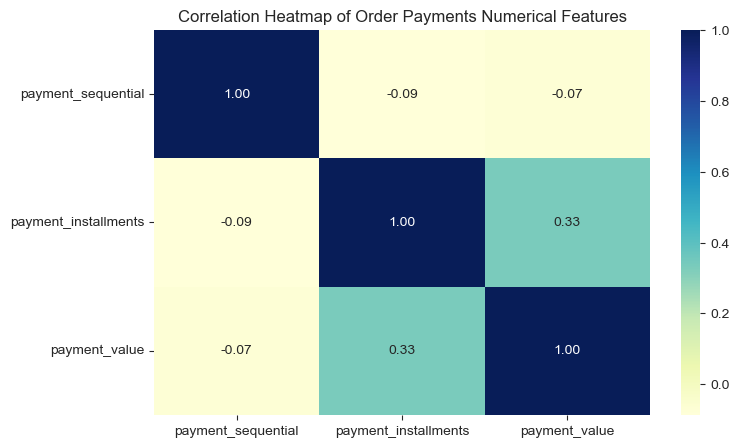

In [36]:
# Compute correlation matrix for numerical columns in df_order_payments
corr = df_order_payments.select_dtypes(include=[np.number]).corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap of Order Payments Numerical Features")
plt.show()

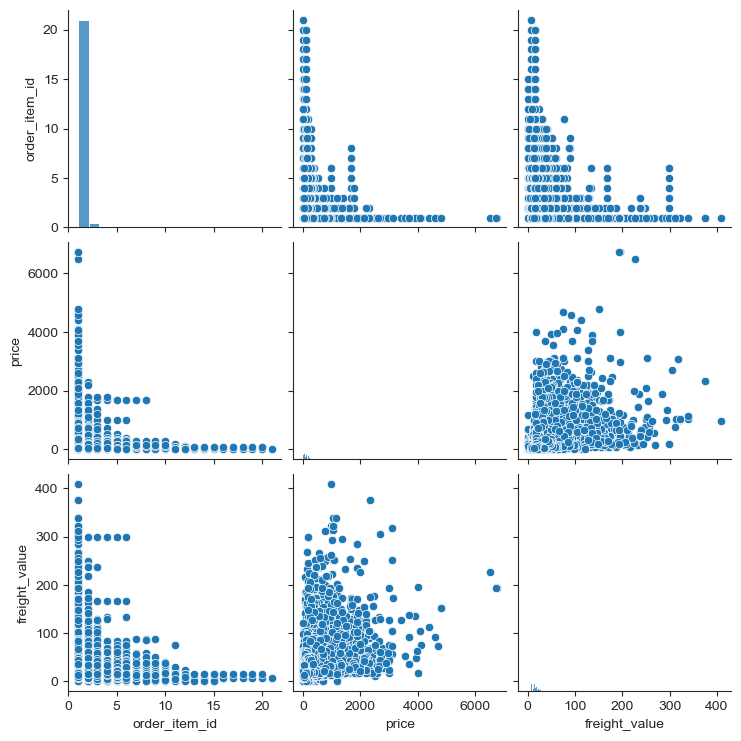

In [37]:
# Pair plot for numerical columns in order reviews
sns.pairplot(df_order_items.select_dtypes(include=[np.number]))
plt.show()

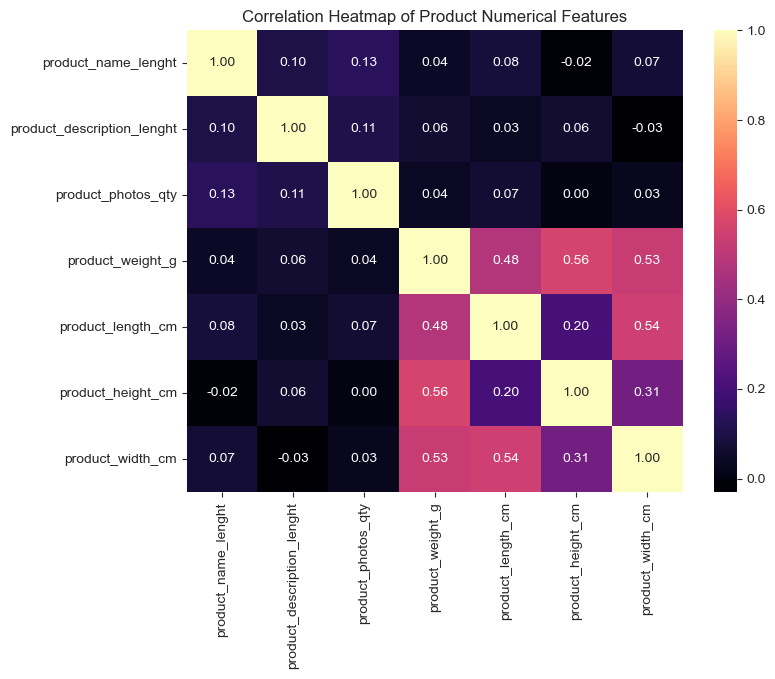

In [39]:
# Compute correlation matrix for numerical columns in df_products
prod_corr = df_products.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(prod_corr, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap of Product Numerical Features")
plt.show()

In [41]:
#sns.pairplot(df_geolocation.select_dtypes(include=[np.number]))
#plt.show()

### Bivariate Analysis for Group Data 
- Grouped bar charts or scatter plots

Text(0, 0.5, 'Statewise Average Order Value')

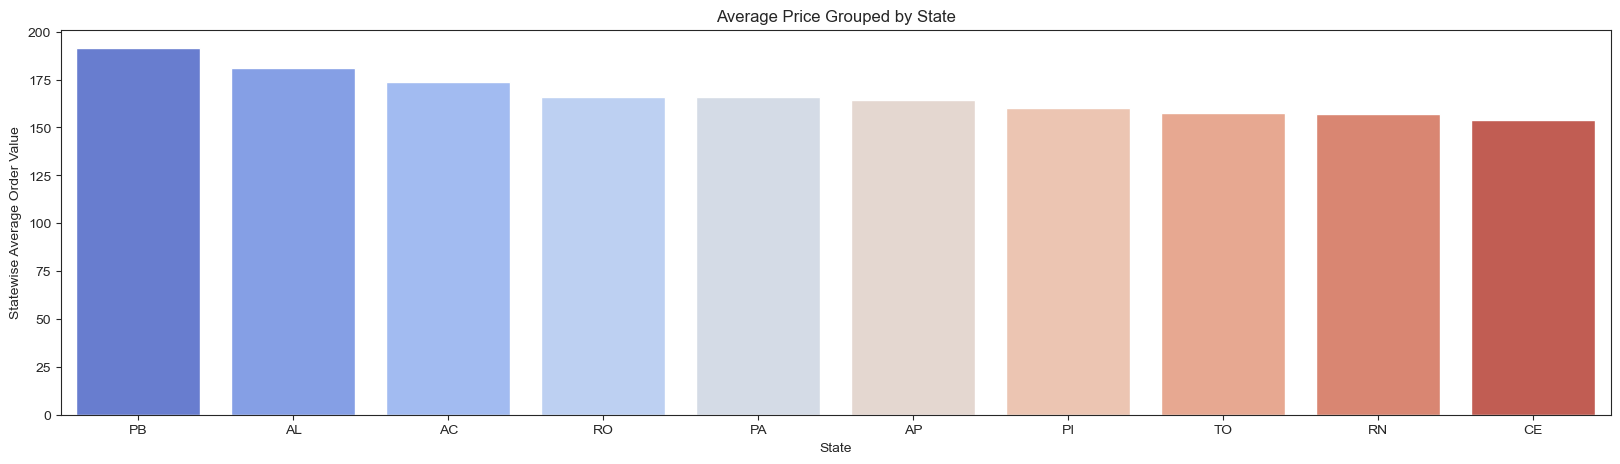

In [42]:
# Merge datasets as necessary
merged_df =df_orders_dataset.merge(df_order_items, on='order_id').merge(df_customers, on='customer_id')
#---------- Grouped bar charts or scatter plots
avg_order_value_by_state = merged_df.groupby('customer_state')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 5))
sns.barplot(x=avg_order_value_by_state.index, y=avg_order_value_by_state.values, palette="coolwarm")
plt.title("Average Price Grouped by State")
plt.xlabel("State")
plt.ylabel("Statewise Average Order Value")

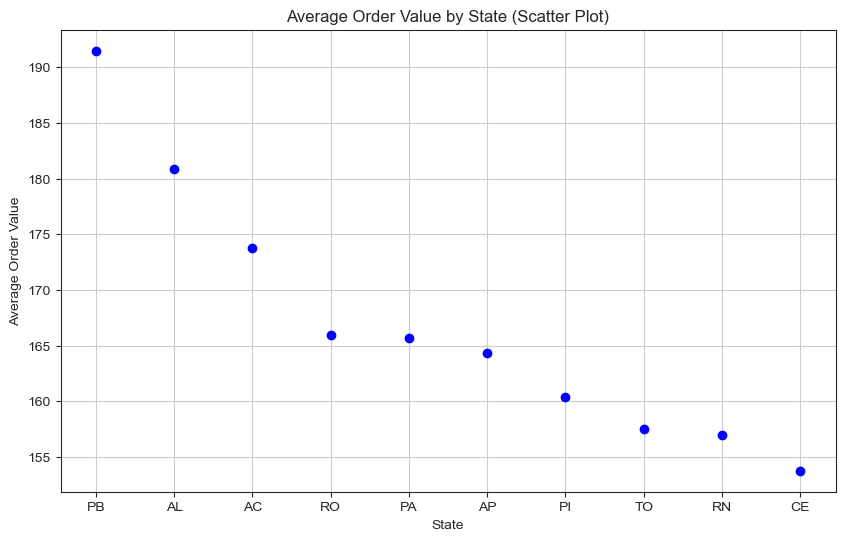

In [43]:
# Analysis of Average Order Value by State
plt.figure(figsize=(10, 6))
plt.scatter(avg_order_value_by_state.index, avg_order_value_by_state.values, color='blue')
plt.title("Average Order Value by State (Scatter Plot)")
plt.xlabel("State")
plt.ylabel("Average Order Value")
plt.grid(True)
plt.show()

### Multivariate Analysis  

- Explore relationships between two or more variables simultaneously.
- Use pair plots and correlation heatmaps for numerical features.
- Visualize grouped summaries (e.g., average order value by state/city).
- Analyze categorical vs. numerical with box plots, violin plots, and grouped bar charts.
- Use scatter plots for numerical vs. numerical relationships.
- Consider pivot tables or groupby for aggregated insights.
- Look for patterns, trends, and interactions between variables.


### Explore Patterns and Trends

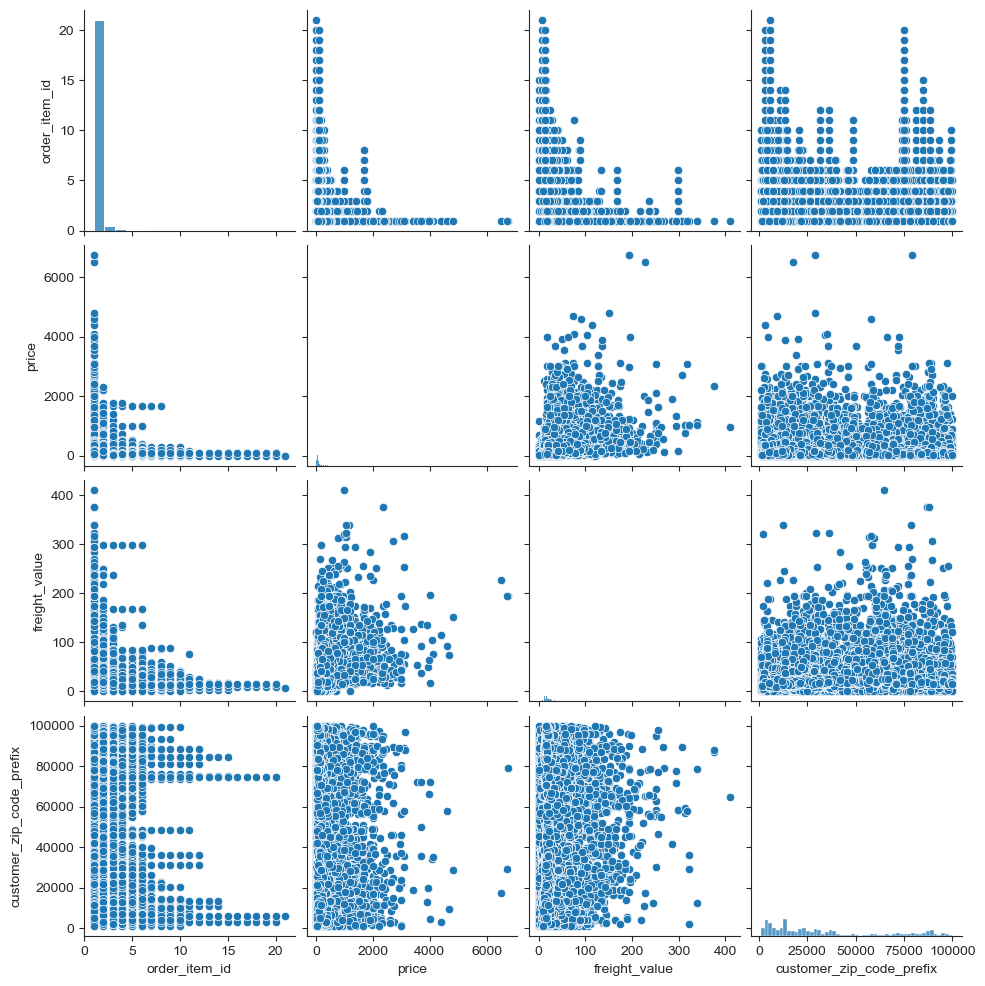

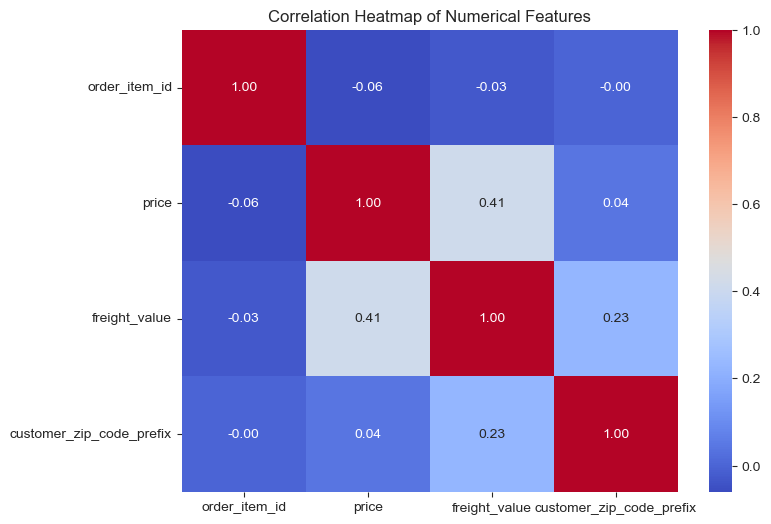

In [45]:
# Explore patterns and trends between variables using pairplot and correlation heatmap
numeric_cols = merged_df.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Analyze categorical vs. numerical 

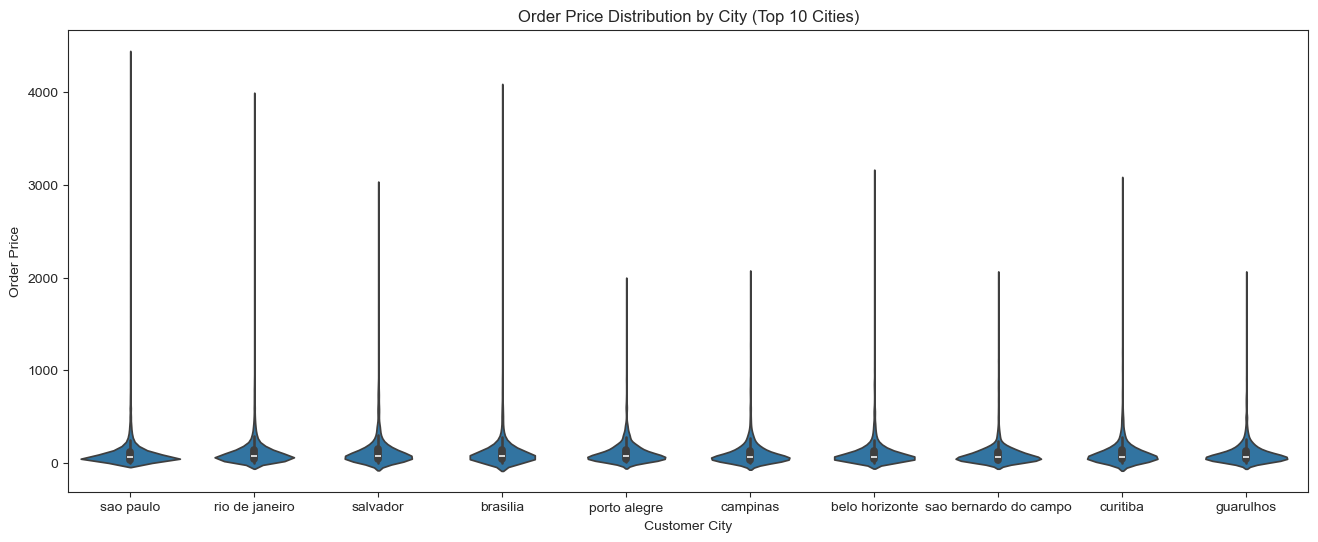

In [46]:
# Example 2: Violin plot of order price by top 10 customer cities
top_cities = merged_df['customer_city'].value_counts().index[:10]
plt.figure(figsize=(16, 6))
sns.violinplot(x='customer_city', y='price', data=merged_df[merged_df['customer_city'].isin(top_cities)])
plt.title('Order Price Distribution by City (Top 10 Cities)')
plt.xlabel('Customer City')
plt.ylabel('Order Price')
plt.show()

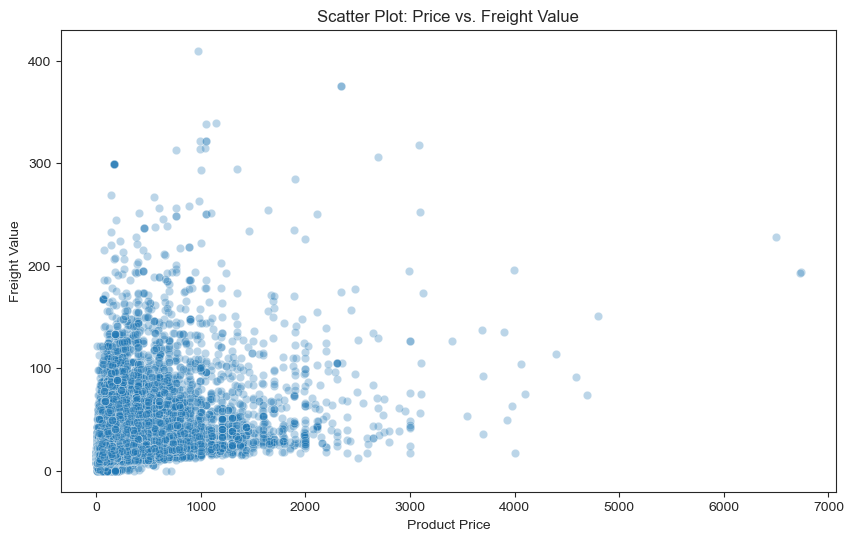

In [47]:
# Scatter plot: Price vs. Freight Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=merged_df, alpha=0.3)
plt.title('Scatter Plot: Price vs. Freight Value')
plt.xlabel('Product Price')
plt.ylabel('Freight Value')
plt.show()

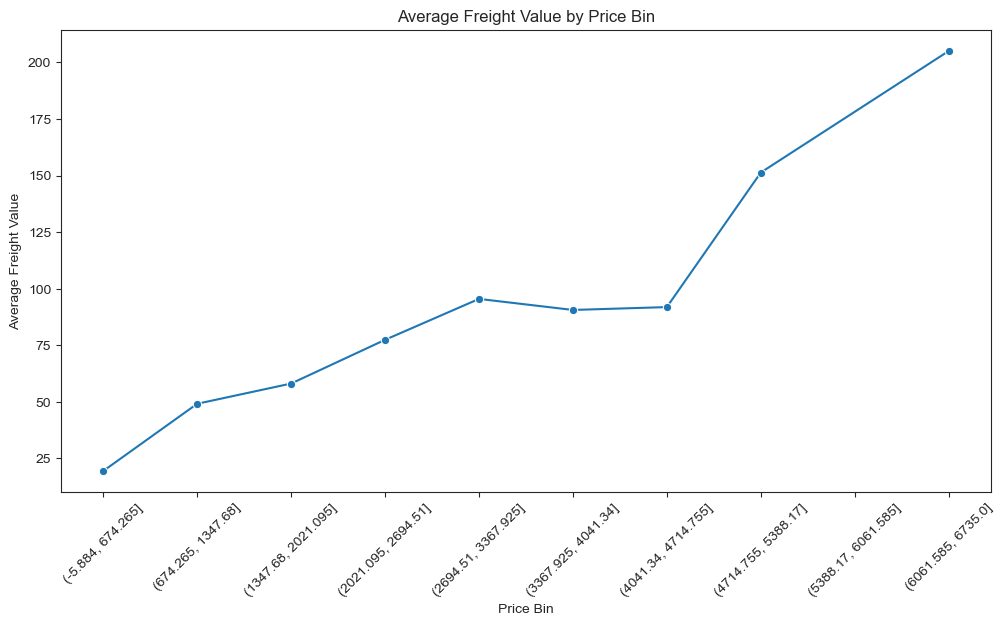

In [48]:
# Example: Average freight value by price bins (aggregated insight)
merged_df['price_bin'] = pd.cut(merged_df['price'], bins=10)
pivot_table = merged_df.groupby('price_bin')['freight_value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot_table['price_bin'].astype(str), y=pivot_table['freight_value'], marker='o')
plt.title('Average Freight Value by Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Average Freight Value')
plt.xticks(rotation=45)
plt.show()

#### Use pair plots and correlation heatmaps for numerical features.

Correlation between price and freight_value:
                   price  freight_value
price          1.000000       0.414204
freight_value  0.414204       1.000000


Text(0.5, 1.0, 'Correlation Heatmap: Price and Freight Value')

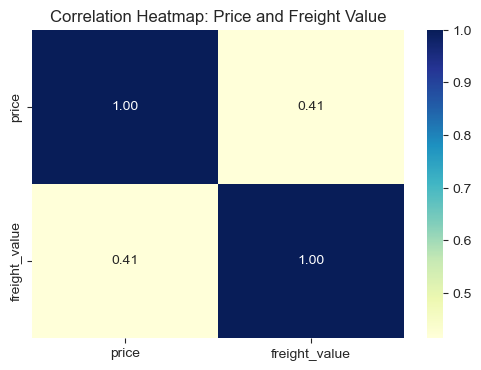

In [49]:
# Look for patterns: Correlation between price and freight_value
correlation = merged_df[['price', 'freight_value']].corr()
print("Correlation between price and freight_value:\n", correlation)
# Correlation heatmap for price and freight_value
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap: Price and Freight Value')


### Feature Engineering
Feature engineering involves creating new variables or transforming existing ones to improve the performance of data analysis or machine learning models. This includes generating time-based features, aggregations, binning, and applying transformations to handle skewed data.
the creation of features like `delivery_time`, `price_bin`, and aggregated metrics such as `avg_order_value_by_state` and `delivery_time_by_region` are all part of feature engineering. 

#### Q1: How does delivery time vary across different regions?

In [50]:
# Delivery time variation across regions
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['delivery_time'] = (merged_df['order_delivered_customer_date']- merged_df['order_purchase_timestamp']).dt.days
merged_df.head()
delivery_time_by_region = merged_df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False).head(10)
delivery_time_by_region

customer_state
RR    27.826087
AP    27.753086
AM    25.963190
AL    23.992974
PA    23.301708
MA    21.203750
SE    20.978667
CE    20.537167
AC    20.329670
PB    20.119454
Name: delivery_time, dtype: float64

Text(0, 0.5, 'Average Delivery Time')

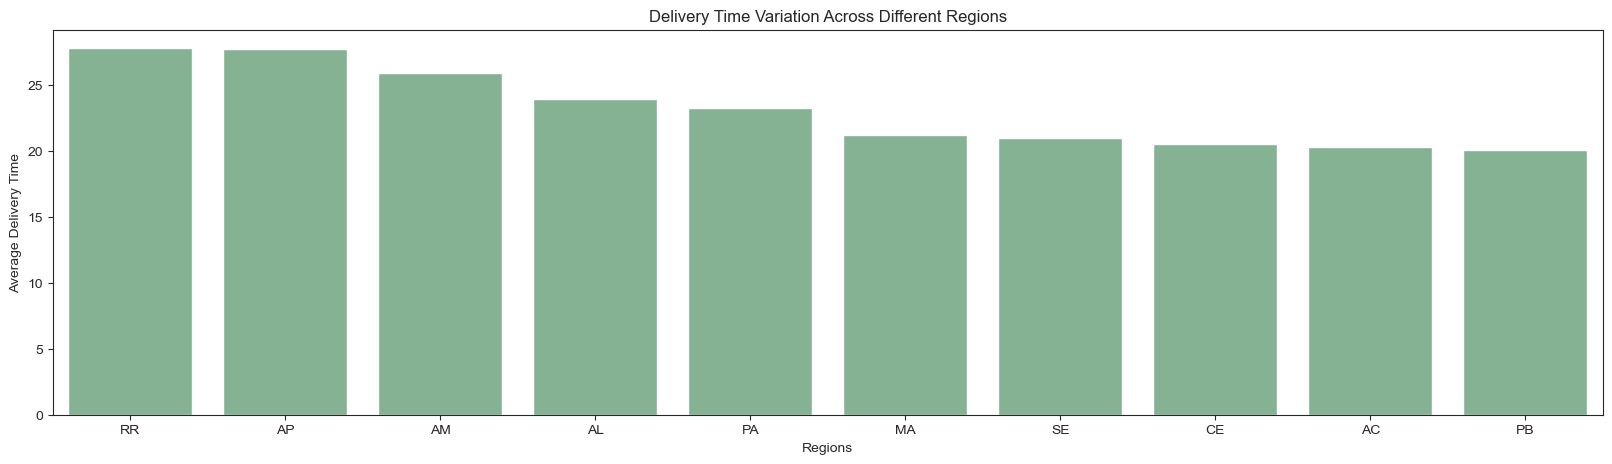

In [51]:
plt.figure(figsize=(20, 5))
sns.set_palette("crest")
sns.barplot(x=delivery_time_by_region.index, y=delivery_time_by_region.values)
plt.title("Delivery Time Variation Across Different Regions")
plt.xlabel("Regions")
plt.ylabel("Average Delivery Time")

In [52]:
# Feature Engineering Examples

# 1. Create a new feature: total_order_value (price + freight_value)
merged_df['total_order_value'] = merged_df['price'] + merged_df['freight_value']

# 2. Create a feature for delivery delay (actual delivery vs. estimated)
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
merged_df['delivery_delay'] = (
    merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']
).dt.days

# 3. Create a feature for order month
merged_df['order_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# 4. Create a binary feature: was_delivered_late
merged_df['was_delivered_late'] = merged_df['delivery_delay'] > 0

# Display the first few rows with new features
merged_df[['price', 'freight_value', 'total_order_value', 'delivery_time', 'delivery_delay', 'order_month', 'was_delivered_late']].head()

,price,freight_value,total_order_value,delivery_time,delivery_delay,order_month,was_delivered_late
0,29.99,8.72,38.71,8.0,-8.0,2017-10,False
1,118.70,22.76,141.46,13.0,-6.0,2018-07,False
2,159.90,19.22,179.12,9.0,-18.0,2018-08,False
3,45.00,27.20,72.20,13.0,-13.0,2017-11,False
4,19.90,8.72,28.62,2.0,-10.0,2018-02,False


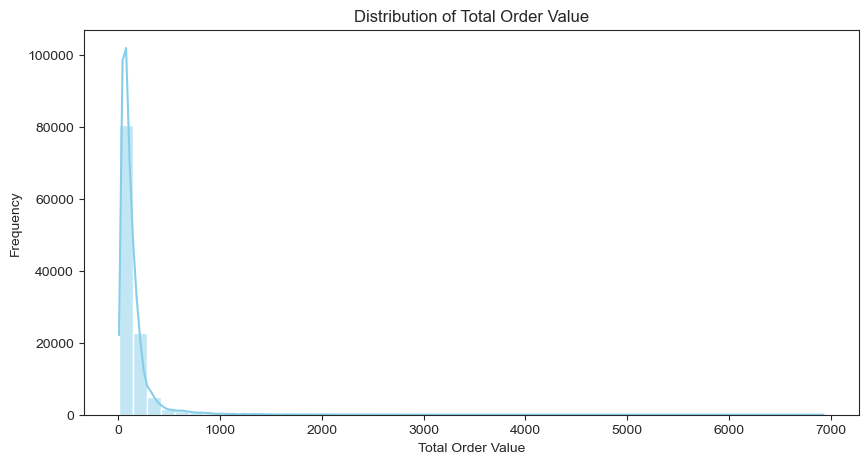

In [53]:
# Display the first few rows with new features
merged_df[['price', 'freight_value', 'total_order_value', 'delivery_time', 'delivery_delay', 'order_month', 'was_delivered_late']].head()

# Plot distribution of total_order_value
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['total_order_value'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Order Value')
plt.xlabel('Total Order Value')
plt.ylabel('Frequency')
plt.show()

### Q7: Find Regions with high Review Score
This code is part of feature engineering as it creates an aggregated feature (average review score by region)


In [55]:
# 5. Regions with higher review score
df_merged_data = df_orders_dataset.merge(df_order_reviews, on='order_id', how='inner').merge(df_customers, on = 'customer_id', how='inner')
highest_review_score = df_merged_data.groupby('customer_state')['review_score'].mean().sort_values(ascending=False).head(10)
print(highest_review_score)

# Plotting the regions with higher review scores
plt.figure(figsize=(20, 5))
sns.lineplot(x=highest_review_score.index, y=highest_review_score.values, color="red", marker="o")
plt.title("Regions with Higher Review Scores")
plt.xlabel("Regions")
plt.ylabel("Average Review Score")
plt.show()

NameError: name 'df_order_reviews' is not defined

#### Q8: Are Review Messages received ?
- This code is part of the "Univariate Analysis" and "Feature Engineering" sections of EDA.
- It explores the presence of review messages (text data) and creates a filtered dataset for further analysis.
- It helps in understanding the distribution and availability of review comments, which is useful for text analysis or sentiment analysis.

In [58]:
#___________________________________________________________________________
# find all order id's whose messages received, with non-NaN review comments
#____________________________________________________________________________
# Merge the orders and reviews dataframes on 'order_id'
reviews_merged_df = df_order_items.merge(df_order_reviews, on='order_id', how='left')

# Check reviews received for each order
reviews_received = reviews_merged_df[~reviews_merged_df['review_comment_message'].isna()]

# Print the first few rows of the reviews received
print(reviews_received[['order_id', 'review_comment_message']].head())

# Save the merged reviews to a CSV file if needed
reviews_received.to_csv('reviews_received.csv', index=False)

NameError: name 'df_order_reviews' is not defined

#### Q9: Most Popular Categories By City
- This output (popular_categories_by_city) is part of the "Univariate Analysis" and "Feature Engineering" sections of EDA.
- Univariate Analysis: It summarizes the most popular product category for each city (single variable distribution per city).
- Feature Engineering: It creates a new aggregated feature (most popular category by city) for further analysis or modeling.


In [57]:
# 6. Most popular product categories by city
merged_df = df_orders_dataset.merge(df_order_items, on='order_id').merge(df_customers, on='customer_id')
merged_df = merged_df.merge(df_products[['product_id', 'product_category_name']], on='product_id')

popular_categories_by_city = merged_df.groupby(['customer_city', 'product_category_name'])['order_item_id'].count().unstack().idxmax(axis=1)
popular_categories_by_city

customer_city
abadia dos dourados                cool_stuff
abadiania                     eletroportateis
abaete                     relogios_presentes
abaetetuba             informatica_acessorios
abaiara                            automotivo
                                ...          
xinguara                          eletronicos
xique-xique                   cama_mesa_banho
zacarias                           automotivo
ze doca                     alimentos_bebidas
zortea                 informatica_acessorios
Length: 4095, dtype: object

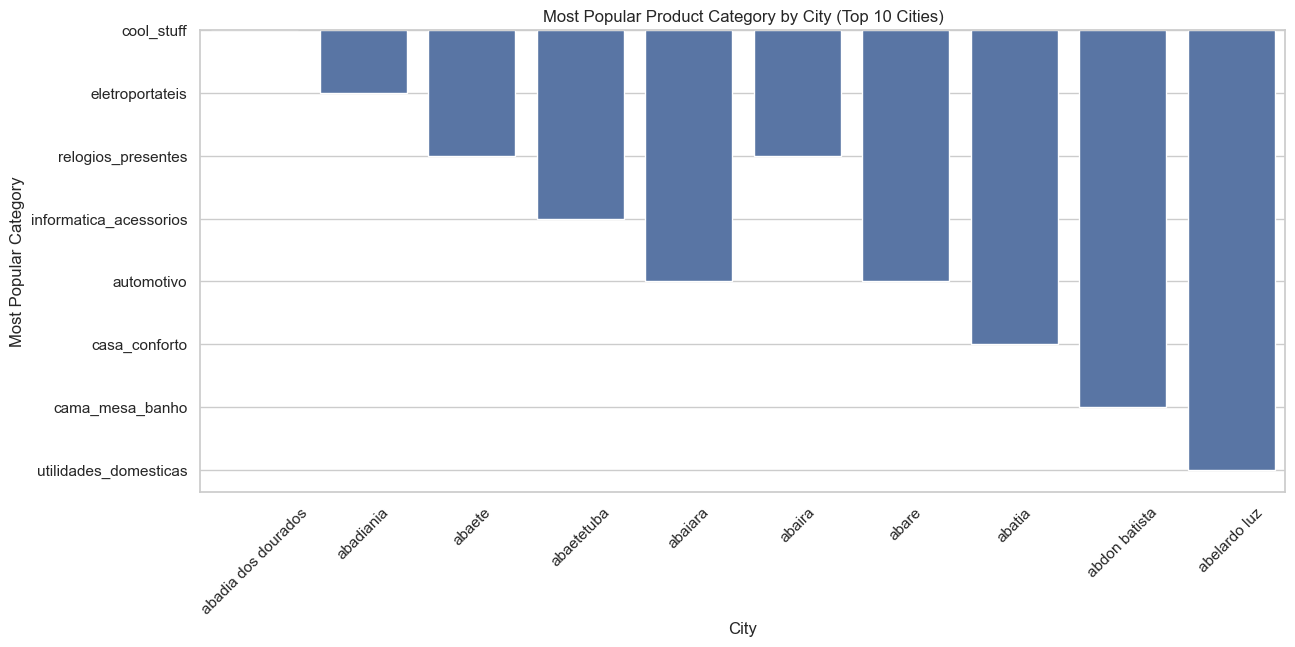

In [59]:
# Plot the most popular product categories by city (top 10 cities)
top_cities = popular_categories_by_city.index[:10]
top_categories = popular_categories_by_city.loc[top_cities]

plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x=top_cities, y=top_categories.values)
plt.title("Most Popular Product Category by City (Top 10 Cities)")
plt.xlabel("City")
plt.ylabel("Most Popular Category")
plt.xticks(rotation=45)
plt.show()

# Findings:

The analysis of dataframe shows the top 10 cities with the highest number of customers.  
This helps identify the cities with the largest customer bases, which can be useful for targeted marketing or logistics planning.
1. The pairplot visualizes relationships and distributions among numerical features (order_item_id, price, freight_value, customer_zip_code_prefix).
    - It helps spot linear/nonlinear relationships, clusters, and outliers.
2. The correlation heatmap quantifies the strength and direction of linear relationships between numerical variables.
    - For example, price and freight_value may show a moderate positive correlation, indicating higher-priced items tend to have higher shipping costs.
    - Other features like order_item_id and customer_zip_code_prefix show little to no correlation with price or freight_value.
3. The violin plot reveals the distribution and spread of order prices in the top 10 customer cities.
    - Some cities have higher median prices or wider price ranges, indicating local purchasing power or product mix differences.
    - Outliers and skewness in price distributions can be visually identified for each city.
Example 2: Violin plot of order price by top 10 customer cities

#### Data Visualization for Grouped Data
   - The grouped bar chart shows the top 10 states with the highest average order value (price).
   - This helps identify which states have customers who spend more per order, revealing regional purchasing power or product mix differences.
   - The correlation matrix and heatmap for numerical columns in `df_order_payments` reveal relationships between payment-related features (e.g., payment value, number of installments).
   - Strong correlations indicate which payment features move together, which can inform payment behavior analysis or feature selection for modeling.

These visualizations provide insights into regional sales patterns and payment feature relationships in the Olist dataset.


### Findings from Feature Engineering and Analysis

1. The new feature 'total_order_value' (sum of price and freight value) allows us to analyze the complete monetary value of each order, not just the product price.
2. 'delivery_delay' highlights how often and by how many days deliveries are late or early compared to the estimated date.
3. The 'order_month' feature enables time-based trend analysis, such as seasonality in orders or delivery performance.
4. The binary feature 'was_delivered_late' makes it easy to quantify and visualize the proportion of late deliveries.
5. These engineered features provide deeper insights into customer experience, operational efficiency, and can be used for further predictive modeling or business intelligence.



#### Key Insights from EDA
 Order Trends:

  The dataset shows growth in order volume over time, with seasonal peaks.

 Geographic Distribution:

  Most customers come from São Paulo (SP), followed by Rio de Janeiro (RJ).

 Product Categories:

  Bed/bath/table, health/beauty, and sports/leisure are top-selling categories.

 Payment Methods:

  Credit card is the most popular payment method (75% of orders).

 Delivery Performance:

  Most orders are delivered on time, but some states have longer delivery times.

 Review Scores:

  Most reviews are positive (scores 4-5), with delivery time impacting scores.

 Customer Behavior:

  Most customers make a single purchase, with a small percentage of repeat buyers.

Sales Performance:

 - Monthly sales showed seasonal patterns with peaks in November (likely due to Black Friday)

 - Average order value was R$137, with electronics being the highest-value category

 - Top-selling categories were bed/bath/table (16.2%), health/beauty (12.9%), and sports/leisure (11.9%)
Customer Behavior:
 - Average customer made 1.6 purchases during the dataset period (2016-2018)
 - Repeat purchase rate was 9.6%, indicating moderate customer loyalty
 - Highest repurchase rates were in office supplies (13.2%) and computers (11.8%)
Geographical Distribution:
 - São Paulo state accounted for 41.6% of all orders
 - Rio de Janeiro (12.8%) and Minas Gerais (10.5%) were next largest markets
Northern states had the lowest e-commerce penetration
Delivery Performance:
 - Average delivery time was 12.5 days
 - 8.3% of deliveries arrived late
 - Fastest deliveries were in Santa Catarina (9.2 days average)
 - Slowest deliveries were to Roraima (22.7 days average)
Customer Satisfaction:
 - Average review score was 4.09/5
 - 58% of reviews were 5-star, while 6% were 1-star
 - Delivery time was the strongest predictor of low review scores
 - Electronics had the lowest average review scores (3.8/5)
Payment Methods:
 - Credit card was most popular (73.9% of orders)
 - Boleto (bank slip) accounted for 19.4%
 - Average payment installments: 2.8
 - Higher-value orders tended to use more installments
Seller Performance:
 - Top 10% of sellers accounted for 58% of total sales
 - Average seller rating was 4.0/5
 - Sellers with faster handling times had higher review scores
Business Implications
Opportunities for Growth:
 - Expand marketing in underserved northern regions
 - Develop loyalty programs to increase repeat purchases
 - Focus on improving electronics category satisfaction
Operational Improvements:
 - optimize logistics to northern states to reduce delivery times
 - Implement seller performance incentives for faster handling
 - Develop predictive models for late deliveries
Customer Experience:
 - Set clearer delivery expectations for remote areas
 - Improve packaging/quality control for electronics
 - Offer installment payment options strategically